In [1]:
import numpy as np 
import pandas as pd


In [2]:
PREFIX="simba_"
#PREFIX="eyeriss_"

In [3]:
df = pd.read_csv(f"data/{PREFIX}energy_kernels.csv", sep=";", header=None)
df = df.reset_index(drop=True)
df.columns = ["r", "timeloop_energy", "timeloop_comp", "timeloop_data", "jirka_comp", "jirka_data"]
df

,r,timeloop_energy,timeloop_comp,timeloop_data,jirka_comp,jirka_data
0,3,5.342644e+07,3148483.74,5.027796e+07,5614272,9843520
1,5,1.171365e+08,8441610.24,1.086949e+08,15052800,9839360
2,7,1.998782e+08,16545556.07,1.833327e+08,29503488,9843968
3,9,2.757559e+08,26382723.84,2.493732e+08,47044800,9843008
4,11,3.810949e+08,39411229.44,3.416837e+08,70276800,9850688


In [4]:
df = df[["r", "timeloop_data"]]
df["r_sq"] = df["r"]*df["r"]

/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df

,r,timeloop_data,r_sq
0,3,5.027796e+07,9
1,5,1.086949e+08,25
2,7,1.833327e+08,49
3,9,2.493732e+08,81
4,11,3.416837e+08,121


# Statistical test using smf.osl

In [6]:
import statsmodels.formula.api as smf


In [7]:
model = smf.ols(formula='timeloop_data ~ r + r_sq', data=df)
results = model.fit()

In [8]:
results

In [9]:
results.summary()

/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          timeloop_data   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     862.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):            0.00116
Time:                        12:40:39   Log-Likelihood:                -82.425
No. Observations:                   5   AIC:                             170.9
Df Residuals:                       2   BIC:                             169.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.321e+07   1.65e+07     -1.407      0.295   -9.42e+07    4.78e+07
r           2.138e+07   5.24e+06      4.081      0.055   -1.16e+06    4.39e+07
r_sq        1.057e+06   3.69e+05      2.865      0.103   -5.31e+05    2.64e+06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.411
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.177
Skew:                          -0.102   Prob(JB):                        0.916
Kurtosis:                       2.102   Cond. No.                         490.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(results.pvalues)

Intercept    0.294766
r            0.055138
r_sq         0.103316
dtype: float64


In [11]:
results.pvalues["r_sq"]

0.10331629163365358

In [12]:
results.pvalues[results.pvalues > .05]

Intercept    0.294766
r            0.055138
r_sq         0.103316
dtype: float64

# Figure

In [13]:
from scipy import stats
m, c, r, p, se = stats.linregress(df["r_sq"], df["timeloop_data"])

print(m, c)

df["sq"] = m*df["r_sq"]+c
df

2541477.252569444 41808275.67154172


/home/petra/miniconda3/envs/accelergy/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,r,timeloop_data,r_sq,sq
0,3,5.027796e+07,9,6.468157e+07
1,5,1.086949e+08,25,1.053452e+08
2,7,1.833327e+08,49,1.663407e+08
3,9,2.493732e+08,81,2.476679e+08
4,11,3.416837e+08,121,3.493270e+08


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

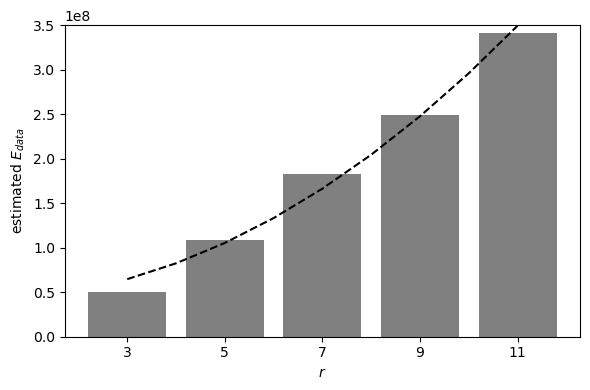

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

dfx = df[["r", "timeloop_data", "sq"]]

sns.barplot(data=dfx, x="r", y="timeloop_data", color="gray")
#sns.lineplot(data=dfx, x=dfx.index, y="sq", ls="--", color="black")

df_aux = pd.DataFrame()
df_aux["x"] = [3,4,5,6,7,8,9,10,11]
df_aux["x2"] = df_aux["x"]**2
df_aux["y"] = m*df_aux["x2"]+c
df_aux["x"] = (df_aux["x"]-3)/2
df_aux1 = df_aux[["x", "y"]]
sns.lineplot(data=df_aux1, x="x", y="y", ls="--", color="black")

ax.set(xlabel="$r$")
ax.set(ylabel="estimated $E_{data}$")
ax.set(ylim=(0,0.35e09))
#ax.set(xlim=(0,50))
#ax.set_xticks(list(range(56,448,1)));
#ax.set_xticks(range(0, 50, 5))

fig.tight_layout()
fig.savefig(f"{PREFIX}sq_trend_r.png", bbox_inches="tight")


In [16]:
dfx

,r,timeloop_data,sq
0,3,5.027796e+07,6.468157e+07
1,5,1.086949e+08,1.053452e+08
2,7,1.833327e+08,1.663407e+08
3,9,2.493732e+08,2.476679e+08
4,11,3.416837e+08,3.493270e+08
